In [40]:
# Data Manupulation
import numpy as np
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution 
from scipy.stats import skew

# Train and Test split
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Ensemble
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load df
df = pd.read_csv('/kaggle/input/random-linear-regression/train.csv')

In [4]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
print(f"Row: {df.shape[0]}\nColumns: {df.shape[1]}")

Row: 700
Columns: 2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [7]:
# cheking duplicate values
df.duplicated().sum()

0

In [8]:
# let's change the collumn name 
df = df.rename(columns={'x':'feature','y':'target'})
df.head()

,feature,target
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [9]:
# descriptive analysis
df.describe()

,feature,target
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [10]:
# feature having hole numbers so change the datatype 
df['feature'] = df['feature'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feature  700 non-null    int64  
 1   target   699 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.1 KB


In [11]:
## Univariate Analysis

<Axes: ylabel='Frequency'>

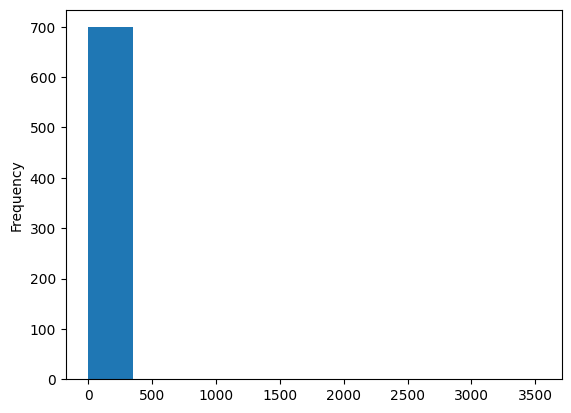

In [12]:
df.feature.plot(kind='hist')

<Axes: >

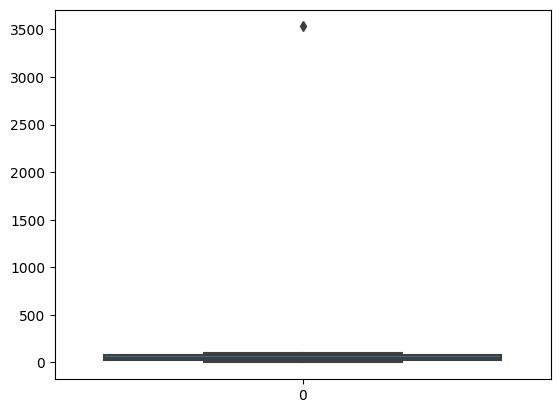

In [13]:
# note: 0 to around 400 having higest frequency let's check the outlier

sns.boxplot(df.feature)

In [14]:
# found outlier in around 3500 so need to handle outlier,
def outlier_founder(data,col):
    q1 = np.quantile(data[col],0.25)
    q3 = np.quantile(data[col],0.75)

    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 *iqr)
    
    print(f"{data[(data[col] < lower_limit) | (data[col] > upper_limit)].shape[0]} Outliers Found")
    data[col] = np.where(data[col] >= upper_limit,np.NaN,data[col])
    data[col] = np.where(data[col] <= lower_limit,np.NaN,data[col])
    print('outlier value changed to NaN..')

In [15]:
outlier_founder(data=df,col='feature')

1 Outliers Found
outlier value changed to NaN..


In [16]:
df.isna().sum()

feature    1
target     1
dtype: int64

In [17]:
# NaN value changed to median value
df['feature'] = df['feature'].fillna(df['feature'].median()).astype(int)
df['target'] = df['target'].fillna(df['target'].mean())

<Axes: xlabel='feature', ylabel='Count'>

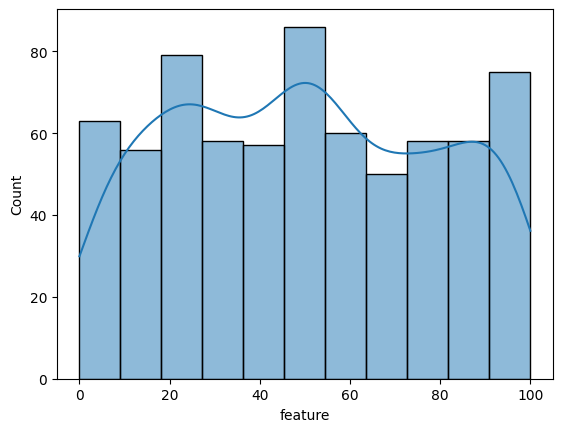

In [41]:
sns.histplot(df.feature,kde='True')

In [18]:
skew(df.feature)    # checking distribution 

0.06682084258755498

In [37]:
# note: it's litle bit right skew

<Axes: xlabel='feature', ylabel='target'>

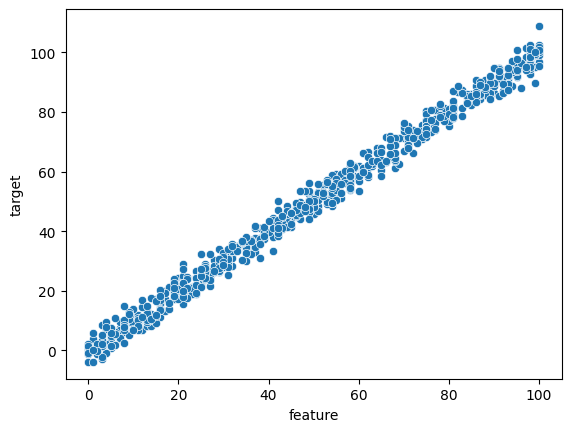

In [19]:
# checking correlation

sns.scatterplot(x=df.feature,y=df.target)

In [38]:
# note: good linear correlation 

In [20]:
## spliting dependent and independent features
x = df[['feature']]
y = df['target']

In [21]:
## test and train split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=11)

In [22]:
models = []

models.append(('linear regression',LinearRegression()))
models.append(('svr',SVR()))
models.append(('decision tree',DecisionTreeRegressor()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('random forest',RandomForestRegressor()))


for name,model in models:
    mod = model.fit(x_train,y_train)
    
    y_pred = mod.predict(x_test)
    
    print(f"{name} Accuracy Score : {r2_score(y_test,y_pred)}")
    print('-------'*8)

linear regression Accuracy Score : 0.9893949950700667
--------------------------------------------------------
svr Accuracy Score : 0.9837822384529569
--------------------------------------------------------
decision tree Accuracy Score : 0.987528462684009
--------------------------------------------------------
KNN Accuracy Score : 0.9879832673945741
--------------------------------------------------------
random forest Accuracy Score : 0.9876135605447293
--------------------------------------------------------


In [23]:
## here linear regression have a high accuacy score (because of good linear correlation) so we can choose linear regression 

# INITIALIZE THE MODEL
final_model = LinearRegression()

# TRAINING
final_model.fit(x_train,y_train
               )
# TESTING
y_pred_train = final_model.predict(x_train)
y_pred_test = final_model.predict(x_test)

# EVALUATION
training_accuarcy = r2_score(y_train,y_pred_train)
testing_accuracy  = r2_score(y_test,y_pred_test)

print(f'Train Accuracy: {round(training_accuarcy,2)*100}')
print(f'Test Accuracy : {round(testing_accuracy,2)*100}')

Train Accuracy: 99.0
Test Accuracy : 99.0


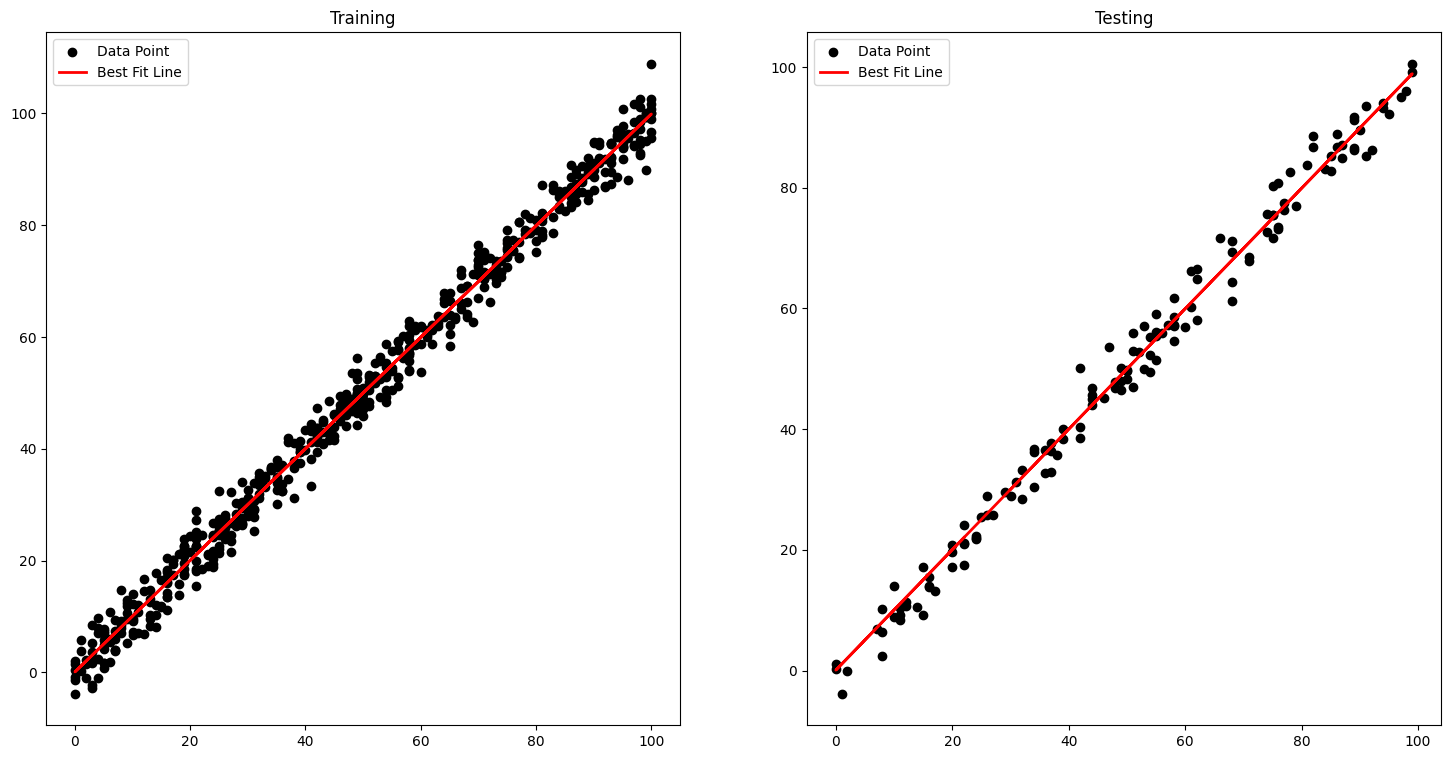

In [24]:
## visualize the best fit line
plt.figure(figsize=(18,9))

plt.subplot(1,2,1)
plt.title('Training')
plt.scatter(x_train,y_train,color='black',label='Data Point')
plt.plot(x_train,y_pred_train,color='red',linewidth=2,label='Best Fit Line')
plt.legend()


plt.subplot(1,2,2)
plt.title('Testing')
plt.scatter(x_test,y_test,color='black',label='Data Point')
plt.plot(x_test,y_pred_test,color='red',linewidth=2,label='Best Fit Line')
plt.legend()

In [25]:
## let's validate the model using validation data

In [26]:
validation_df = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')
validation_df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [27]:
validation_df = validation_df.rename(columns={'x':'feature','y':'target'})

In [28]:
validation_df.shape

(300, 2)

In [29]:
validation_pred = final_model.predict(validation_df[['feature']])

In [30]:
print(f'Validation Accuaacy : {round(r2_score(validation_df.target,validation_pred),3)*100}')

Validation Accuaacy : 98.9


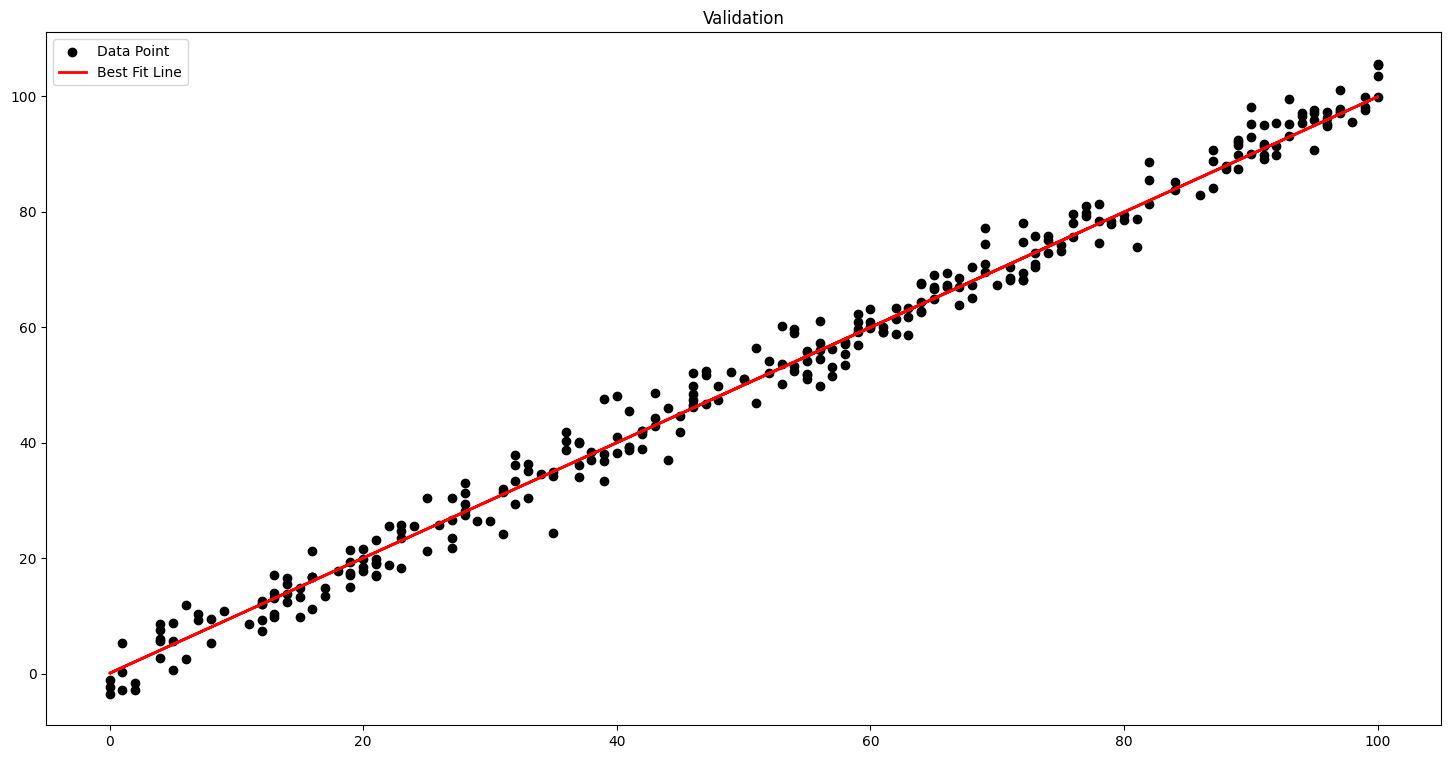

In [36]:
plt.figure(figsize=(18,9))

plt.title('Validation')
plt.scatter(validation_df['feature'],validation_df['target'],color='black',label='Data Point')
plt.plot(validation_df['feature'],validation_pred,color='red',linewidth=2,label='Best Fit Line')
plt.legend()